# Problem statement

Problem: Increasing property rental prices in KL.

Objective: Predict property rental prices in KL.


# References


* https://neptune.ai/blog/when-to-choose-catboost-over-xgboost-or-lightgbm
* https://plotly.com/python/pca-visualization/
* https://catboost.ai/en/docs/concepts/python-reference_catboostregressor
* https://www.geeksforgeeks.org/catboost-ml/
* https://www.geeksforgeeks.org/regression-using-catboost/
* https://www.kaggle.com/code/alexisbcook/scatter-plots
* https://towardsdatascience.com/catboost-regression-in-6-minutes-3487f3e5b329
* https://www.ibm.com/topics/linear-regression#:~:text=IBM-,What%20is%20linear%20regression%3F,is%20called%20the%20independent%20variable.
* https://en.wikipedia.org/wiki/Random_forest#:~:text=Random%20forests%20or%20random%20decision,class%20selected%20by%20most%20trees.
* https://www.sciencedirect.com/topics/earth-and-planetary-sciences/artificial-neural-network#:~:text=Artificial%20neural%20network%20(ANN)%20model,simulate%20the%20human%E2%80%93brain%20processes.


# Library Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical
from sklearn.decomposition import PCA


import warnings
warnings.filterwarnings("ignore")

In [ ]:
oriDf = pd.read_excel("2-MUDAH.xlsx")
df = oriDf.copy()

In [ ]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Dataset Definition

In [ ]:
display(df)

#Information about the dataset
print(df.info())

,PropertyName,RentalPrice,Size,Region,District,Bedrooms,Bathrooms,CarParks,Furnishing,PropertyType
0,The Hipster @ Taman Desa,4200.0,1842,Kuala Lumpur\r,Taman Desa,5,6,2,Fully Furnished,Condominium
1,Segar Courts,2300.0,1170,Kuala Lumpur\r,Cheras,3,2,1,Partially Furnished,Condominium
2,Pangsapuri Teratak Muhibbah 2,1000.0,650,Kuala Lumpur\r,Taman Desa,3,2,0,Fully Furnished,Apartment
3,Sentul Point Suite Apartment,1700.0,743,Kuala Lumpur\r,Sentul,2,2,1,Partially Furnished,Apartment
4,Arte Mont Kiara,1299.0,494,Kuala Lumpur\r,Mont Kiara,1,1,1,Not Furnished,Service Residence
...,...,...,...,...,...,...,...,...,...,...
19038,Pangsapuri Gapura Bayu,1200.0,1000,Selangor\r,Kajang,3,2,0,Partially Furnished,Apartment
19039,BSP 21,1300.0,1427,Selangor\r,Bandar Saujana Putra,4,3,2,Partially Furnished,Service Residence
19040,Ameera Residence,1350.0,1270,Selangor\r,Kajang,3,2,2,Partially Furnished,Condominium
19041,The Arc @ Cyberjaya,1200.0,1100,Selangor\r,Cyberjaya,3,2,1,Fully Furnished,Service Residence


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19043 entries, 0 to 19042
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PropertyName  19043 non-null  object 
 1   RentalPrice   19042 non-null  float64
 2   Size          19043 non-null  int64  
 3   Region        19043 non-null  object 
 4   District      19043 non-null  object 
 5   Bedrooms      19043 non-null  object 
 6   Bathrooms     19043 non-null  int64  
 7   CarParks      19043 non-null  int64  
 8   Furnishing    19042 non-null  object 
 9   PropertyType  19043 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.5+ MB
None


# Data Preprocessing

In [ ]:
#Check for missing values
print(df.isnull().sum())

PropertyName    0
RentalPrice     1
Size            0
Region          0
District        0
Bedrooms        0
Bathrooms       0
CarParks        0
Furnishing      1
PropertyType    0
dtype: int64


In [ ]:
# drop null values
df.dropna(inplace=True)
print(df.isnull().sum())

PropertyName    0
RentalPrice     0
Size            0
Region          0
District        0
Bedrooms        0
Bathrooms       0
CarParks        0
Furnishing      0
PropertyType    0
dtype: int64


In [ ]:
# Replace "More than 10" label with int
df["Bedrooms"].replace("More than 10", 11, inplace = True)


In [ ]:
# Drop rows where the District is '360'
# df = df[df['District'] != '360']
df = df[~df['District'].str.isnumeric()]


In [ ]:
# drop rows from selangor
# selangor has trailing spaces in excel
df['Region'] = df['Region'].str.strip().str.replace('\r', '')

df = df[df['Region'] != 'Selangor']


In [ ]:
df.tail()


,PropertyName,RentalPrice,Size,Region,District,Bedrooms,Bathrooms,CarParks,Furnishing,PropertyType
9478,Sentul Village Mercury Service Apartment,1400.0,900,Kuala Lumpur,Sentul,3,2,1,Not Furnished,Service Residence
9479,Teratak Muhibbah,1000.0,657,Kuala Lumpur,Taman Desa,3,2,0,Fully Furnished,Apartment
9480,The Holmes 2,1488.0,1000,Kuala Lumpur,Cheras,3,2,2,Partially Furnished,Condominium
9481,Faber Heights,2000.0,1200,Kuala Lumpur,Taman Desa,3,2,2,Fully Furnished,Condominium
9482,Seri Puteri Condominium,2000.0,1010,Kuala Lumpur,Cheras,3,3,2,Fully Furnished,Condominium


# EDA

### How does location affect rental prices in Kuala Lumpur?

Different districts within Kuala Lumpur have different rental prices. We plotted a barplot to visualize the average rental prices of each district. This provides a clear visual presentation of how rental prices vary across different districts, so we could compare the average rental prices of each district.


,PropertyName,RentalPrice,Size,Region,District,Bedrooms,Bathrooms,CarParks,Furnishing,PropertyType
0,The Hipster @ Taman Desa,4200.0,1842,Kuala Lumpur\r,Taman Desa,5,6,2,Fully Furnished,Condominium
1,Segar Courts,2300.0,1170,Kuala Lumpur\r,Cheras,3,2,1,Partially Furnished,Condominium
2,Pangsapuri Teratak Muhibbah 2,1000.0,650,Kuala Lumpur\r,Taman Desa,3,2,0,Fully Furnished,Apartment
3,Sentul Point Suite Apartment,1700.0,743,Kuala Lumpur\r,Sentul,2,2,1,Partially Furnished,Apartment
4,Arte Mont Kiara,1299.0,494,Kuala Lumpur\r,Mont Kiara,1,1,1,Not Furnished,Service Residence
...,...,...,...,...,...,...,...,...,...,...
9478,Sentul Village Mercury Service Apartment,1400.0,900,Kuala Lumpur\r,Sentul,3,2,1,Not Furnished,Service Residence
9479,Teratak Muhibbah,1000.0,657,Kuala Lumpur\r,Taman Desa,3,2,0,Fully Furnished,Apartment
9480,The Holmes 2,1488.0,1000,Kuala Lumpur\r,Cheras,3,2,2,Partially Furnished,Condominium
9481,Faber Heights,2000.0,1200,Kuala Lumpur\r,Taman Desa,3,2,2,Fully Furnished,Condominium


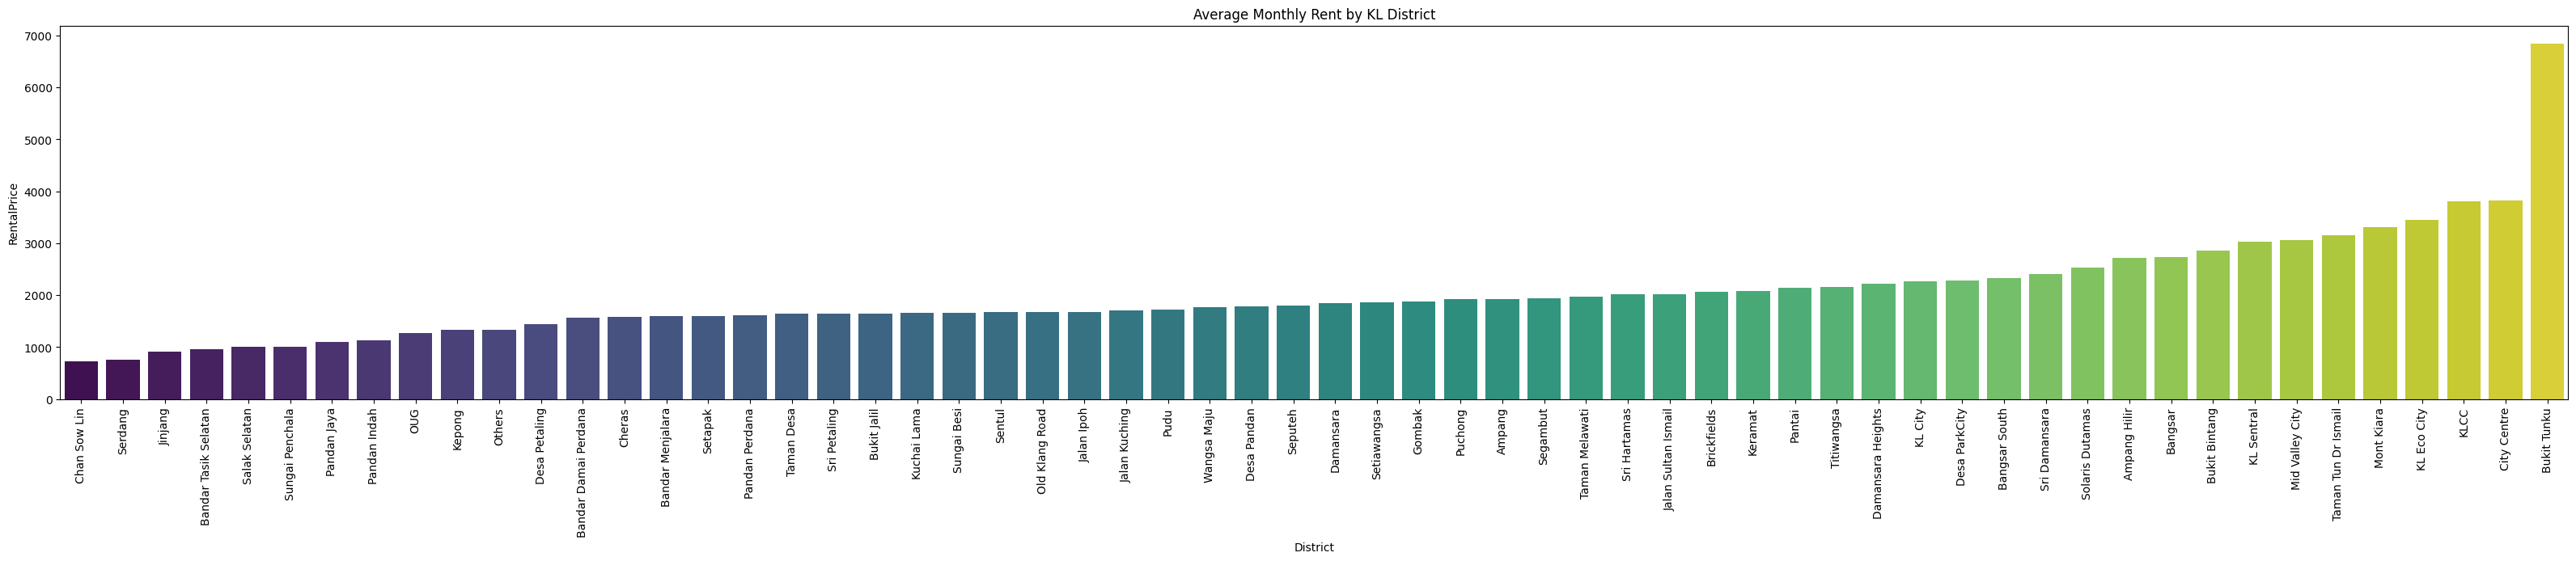

In [ ]:
averageSize = df.groupby('District')['RentalPrice'].mean()
averageSizeDf = averageSize.reset_index().sort_values('RentalPrice', ascending=True)

display(oriDf[oriDf['Region'] == 'Kuala Lumpur\r'])

# Plot the average of rental price based on district
plt.figure(figsize=(40, 6))
sns.barplot(x = 'District', y = 'RentalPrice', data = averageSizeDf, palette='viridis')
plt.xticks(rotation=90)
plt.title('Average Monthly Rent by KL District')
plt.show()

<u>Gathered Insights</u>

By analyzing the bar chart above, the cheapest average monthly rent is district Beranung. While the most expensive average monthly rent is district Bukit Tunku.

### How does property type affect rental prices in Kuala Lumpur?

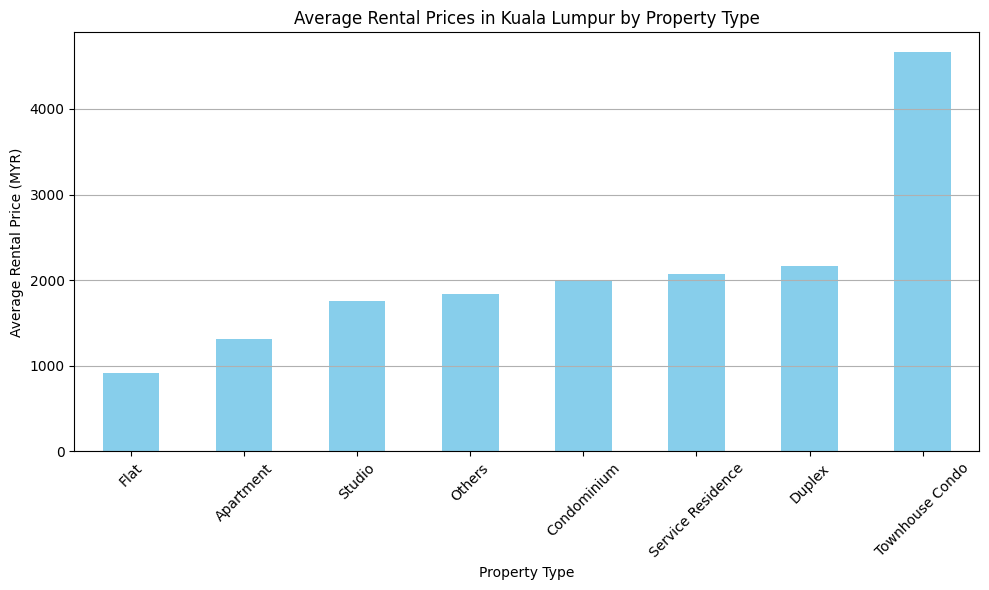

In [ ]:
average_prices = df.groupby('PropertyType')['RentalPrice'].mean().sort_values(ascending=True)
plt.figure(figsize=(10, 6))
average_prices.plot(kind='bar', color='skyblue')
plt.title('Average Rental Prices in Kuala Lumpur by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Rental Price (MYR)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


<u>Gathered Insights</u>

By analyzing the bar chart above, the cheapest average monthly rent is a Flat. While the most expensive average monthly rent is district is Townhouse Condo. The middle of the bar chart of housing type condominuim nad others (likely to be landed housing areas) have the average monthly price range.

### How does property size affect rental prices in Kuala Lumpur?

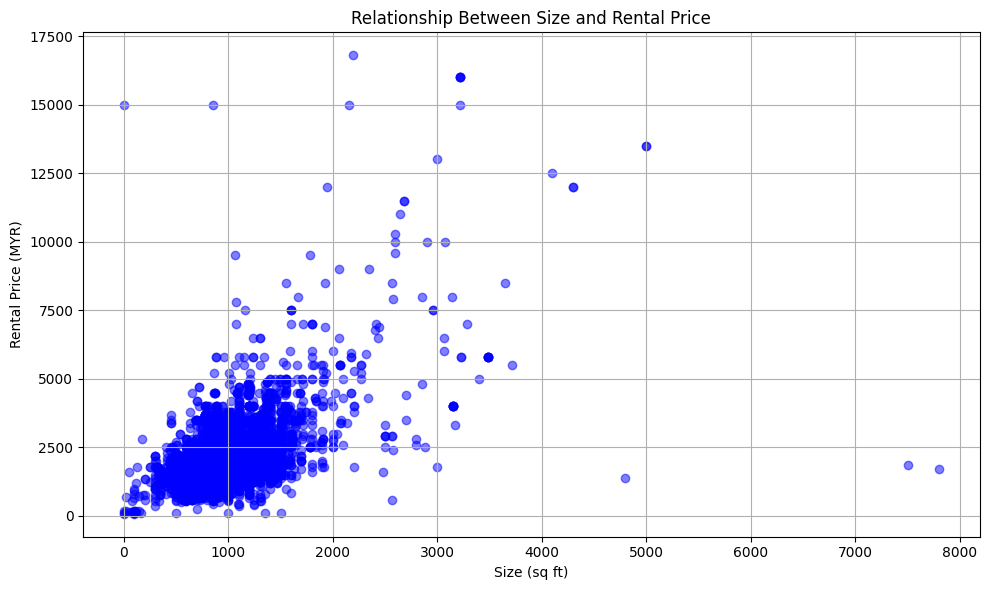

In [ ]:
# Scatter plot to show relationship between size and rental price
plt.figure(figsize=(10, 6))
plt.scatter(df['Size'], df['RentalPrice'], alpha=0.5, color='blue')
plt.title('Relationship Between Size and Rental Price')
plt.xlabel('Size (sq ft)')
plt.ylabel('Rental Price (MYR)')
plt.grid(True)

plt.tight_layout()
plt.show()


<u>Gathered Insights</u>

By analyzing the scatter plot above, we can see that the smaller the size per square feet, the lower the rental price for a property. The cluster can be seen dominating around the rental price range of $0 - $5000, and the size range of 0 to 2000 sq ft.

However, there are a few outliers in the graph whereby a larger sq ft between 7000 to 8000 sq ft has a rental price of under $2500. This should be noted when training the model.

### What is the price distribution across property types in Kuala Lumpur?

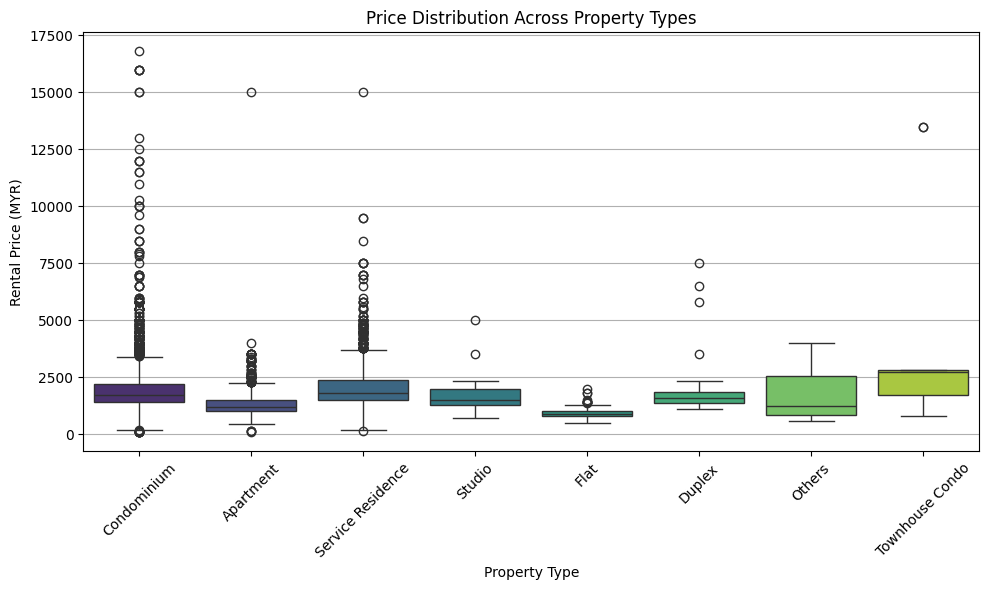

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PropertyType', y='RentalPrice', data=df, palette='viridis')
plt.title('Price Distribution Across Property Types')
plt.xlabel('Property Type')
plt.ylabel('Rental Price (MYR)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<u>Gathered Insights</u>

By analyzing the boxplots above, it each property type seem to have outliers aside from housing type "others" and "townhouse condo". The boxplot for housing type "others" and "townhouse condo" seems to be left skewed and right skewed respectively. This should be kept in mind when training the model.

### What is the impact of furbishing on rental prices in Kuala Lumpur?

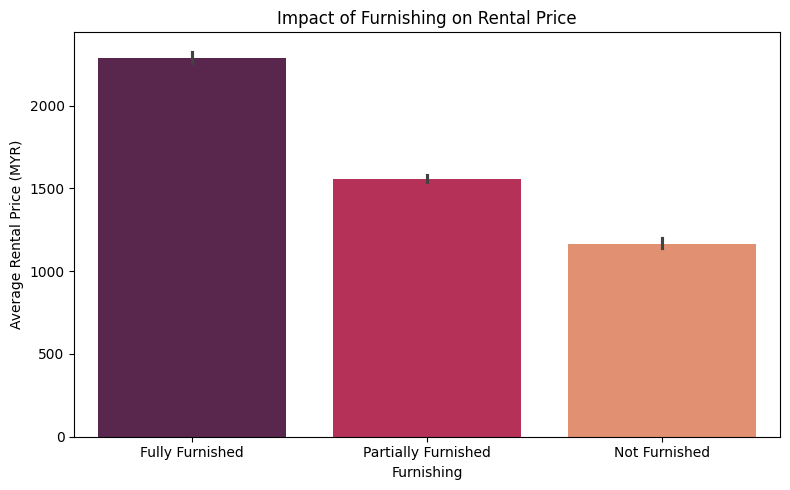

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x='Furnishing', y='RentalPrice', data=df, palette='rocket')
plt.title('Impact of Furnishing on Rental Price')
plt.xlabel('Furnishing')
plt.ylabel('Average Rental Price (MYR)')

plt.tight_layout()
plt.show()

<u>Gathered Insights</u>

By analyzing the graph above, we can obeserve that a partially and fully furnished properties could fetch a significantly higher anverage rental price in KL.  

### What is the demand for property types in Kuala Lumpur?

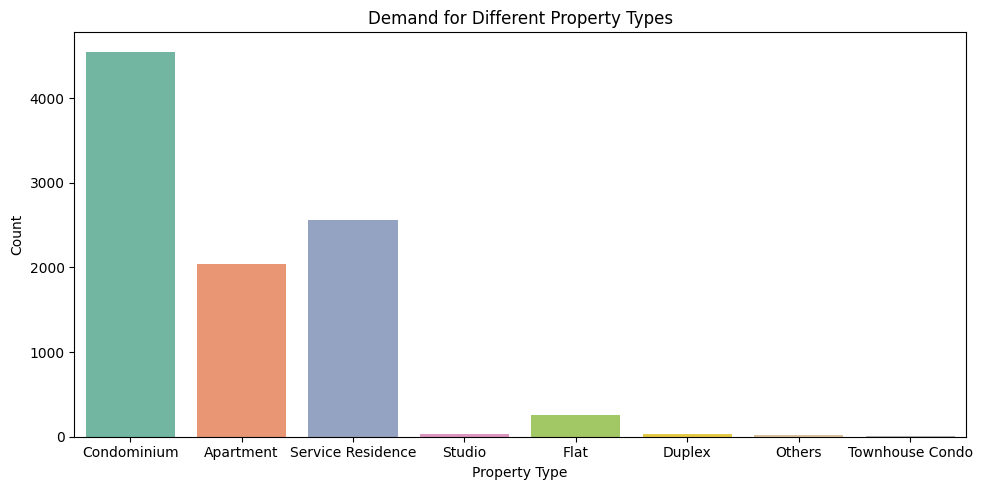

In [ ]:
# Count plot to show the demand for different property types
plt.figure(figsize=(10, 5))
sns.countplot(x='PropertyType', data=df, palette='Set2')
plt.title('Demand for Different Property Types')
plt.xlabel('Property Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


<u>Gathered Insights</u>

By analyzing the graph above, it seems that the top-3 most in-demand property type is condominium, apartment, and service residence. This makes sense as there a KL is filled with high-rise buidlings.

# Feature Engineering


Drop outliers in Rental Prices

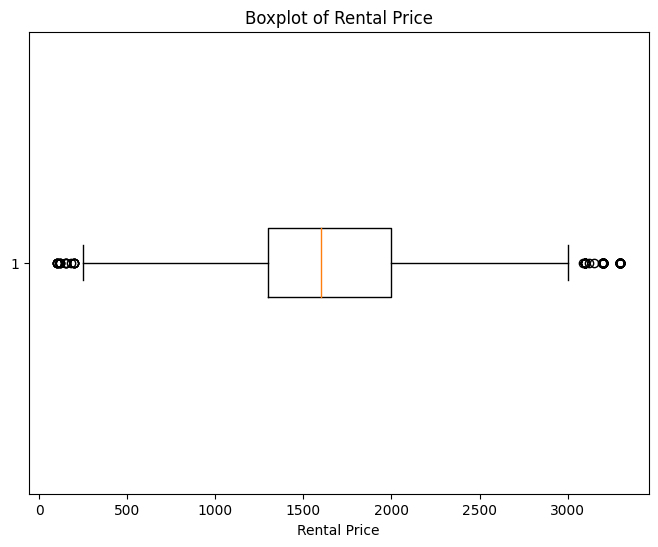

In [ ]:

# Identify outliers based on the boxplot
q1 = df['RentalPrice'].quantile(0.25)
q3 = df['RentalPrice'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = (df['RentalPrice'] < lower_bound) | (df['RentalPrice'] > upper_bound)

df = df[~outliers]

plt.figure(figsize=(8, 6))
plt.boxplot(df['RentalPrice'], vert=False)
plt.title('Boxplot of Rental Price')
plt.xlabel('Rental Price')
plt.show()


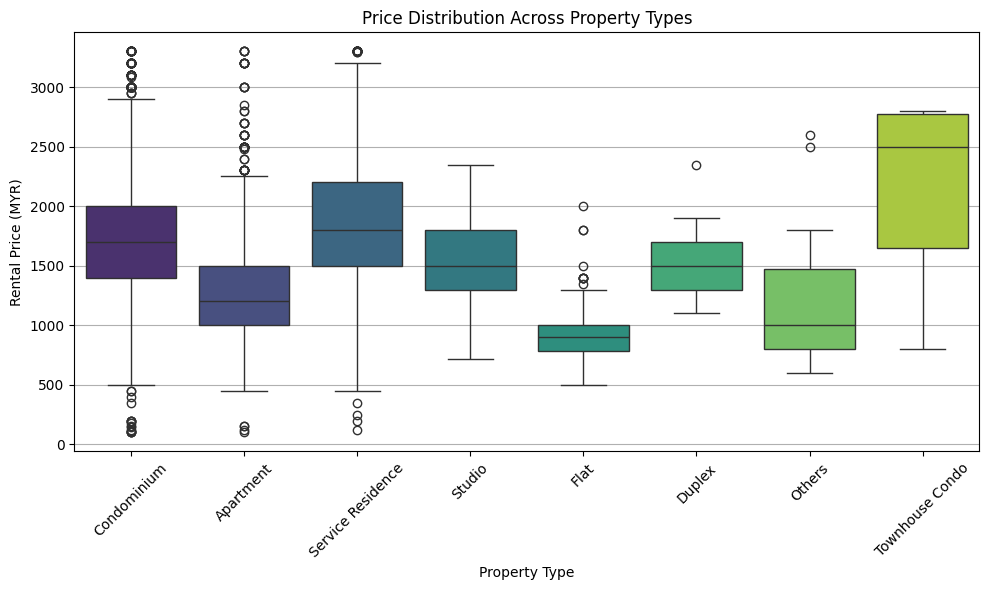

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='PropertyType', y='RentalPrice', data=df, palette='viridis')
plt.title('Price Distribution Across Property Types')
plt.xlabel('Property Type')
plt.ylabel('Rental Price (MYR)')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## PCA Visualised

We first determine the number of principle components required to capture approximately 90% of the variability in the dataset using PCA.

In [ ]:
# Encode categorical variables
label_encoders = {}

for column in ['PropertyName', 'Region', 'Furnishing', 'PropertyType', 'District']:  # Categorical columns
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le



# Drop rows that are not primarily located in KL
# KL is 0 while Selangor is 1
# df.drop(df[df['Region'] == 1].index, inplace = True)

# Standardize the data
dfFeatures = df.drop(columns=['RentalPrice'])  # Target variable
scaler = StandardScaler()
scaledDf = scaler.fit_transform(dfFeatures)

Then, we scaled dataset and plots the cumulative explained variance to determine the optimal number of principal components needed to capture around 90% of the variability in the data.

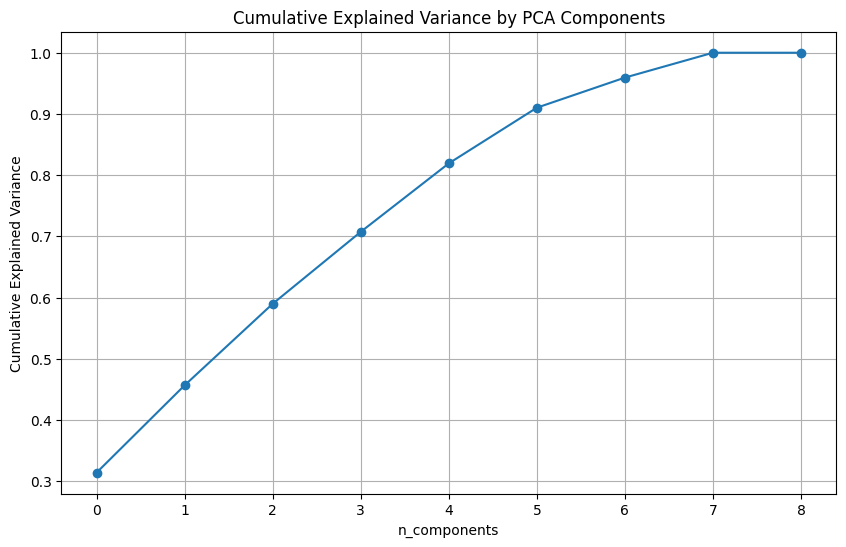

In [ ]:
# Apply PCA
pcaComp = PCA().fit(scaledDf)
cumulativeVar = np.cumsum(pcaComp.explained_variance_ratio_)

# Plot variance of features to get the best amount of n_components to capture around 90% of variability
plt.figure(figsize=(10, 6))
plt.plot(cumulativeVar, marker='o', linestyle='-') # Plot cumulative sum
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid()
plt.show()

In [ ]:
for i, cumulative_variance in enumerate(cumulativeVar):
    print(f'Number of Components: {i+1}, Cumulative Explained Variance: {cumulative_variance:.4f}')
    if cumulative_variance >= 0.9:
        print(f'Selecting {i+1} components to capture at least 90% of the variance.')
        break

Number of Components: 1, Cumulative Explained Variance: 0.3138
Number of Components: 2, Cumulative Explained Variance: 0.4565
Number of Components: 3, Cumulative Explained Variance: 0.5898
Number of Components: 4, Cumulative Explained Variance: 0.7073
Number of Components: 5, Cumulative Explained Variance: 0.8192
Number of Components: 6, Cumulative Explained Variance: 0.9102
Selecting 6 components to capture at least 90% of the variance.


After that, we combine the principle components with a target variable for analysis. Then, we visualize the results using a pairplot.

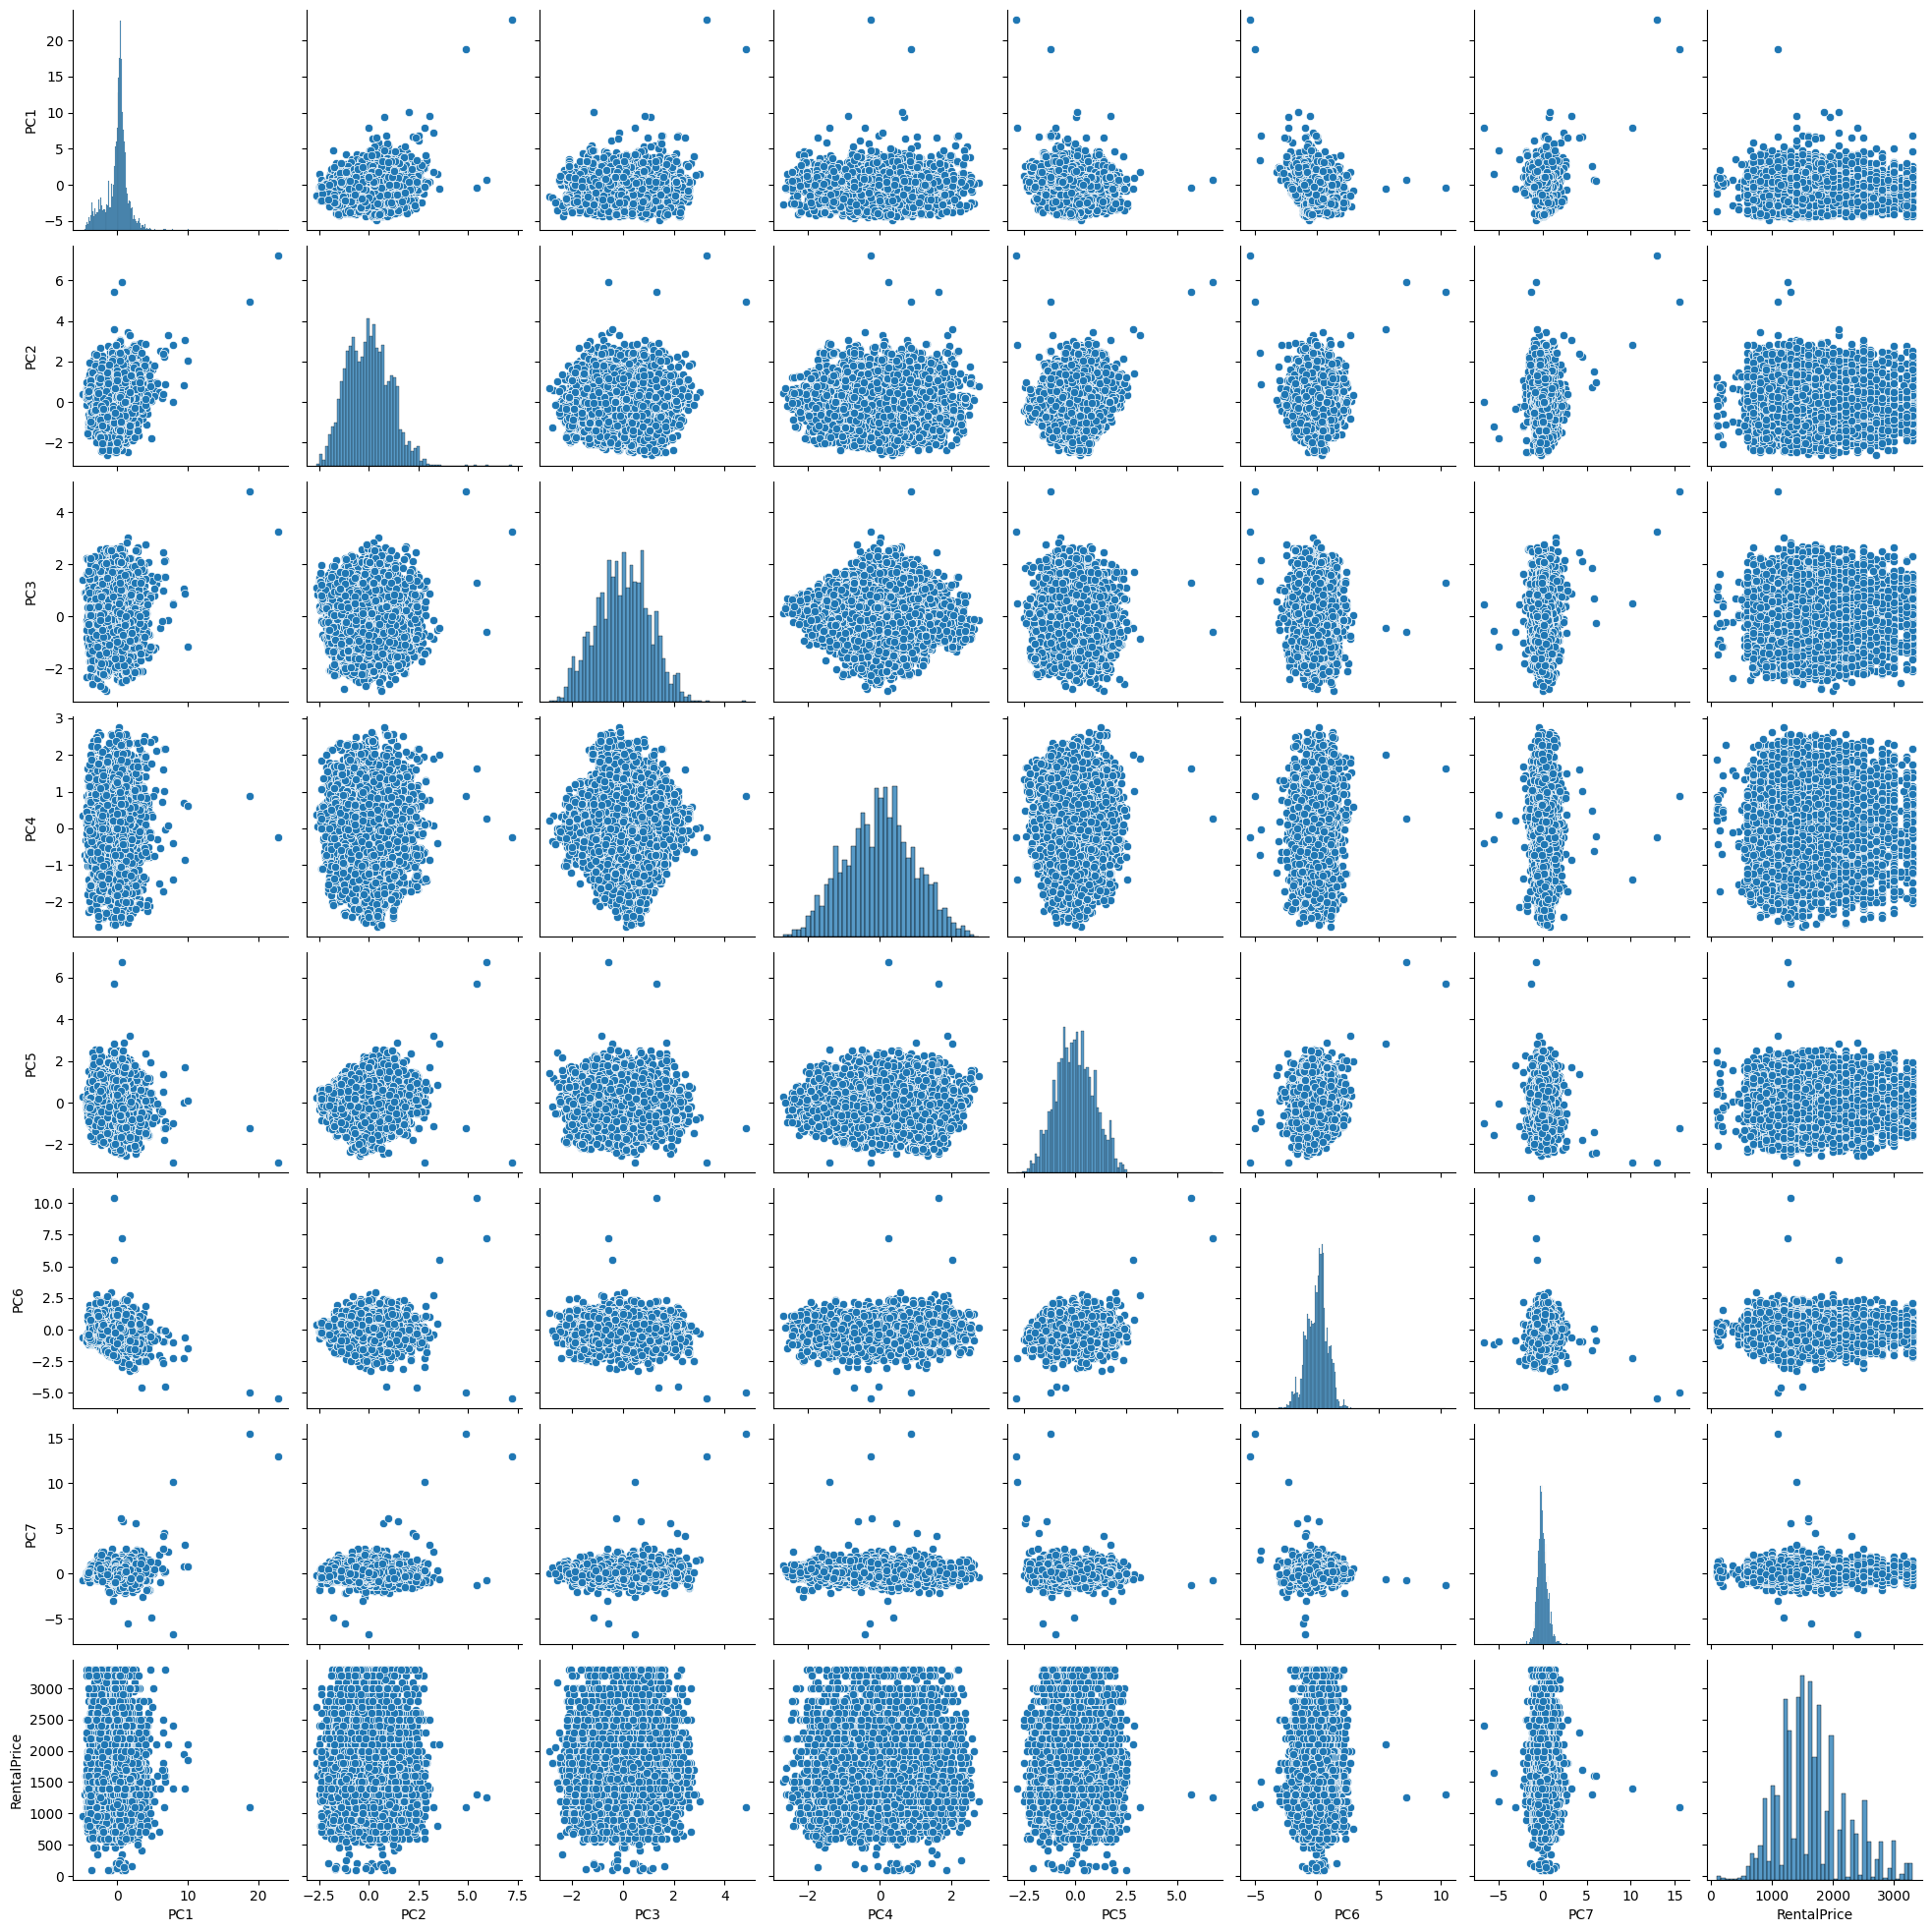

In [ ]:
# Apply PCA
numComp = 7
pca_columns = [f'PC{i+1}' for i in range(numComp)]

dfPCA = PCA(n_components = numComp)
dfPrinComp = dfPCA.fit_transform(scaledDf)
pca_df = pd.DataFrame(data=dfPrinComp, columns = pca_columns)

# Combine with rental prices for analysis
pca_df['RentalPrice'] = df['RentalPrice']

# Visualize the PCA results
#plt.figure(figsize=(10, 6))
#plt.scatter(pca_df2['PC1'], pca_df2['PC2'], c=pca_df2['RentalPrice'], cmap='viridis')
#plt.colorbar(label='Rental Price')
#plt.xlabel('Principal Component 1')
#plt.ylabel('Principal Component 2')
#plt.title('PCA of Rental Properties')
sns.pairplot(pca_df)
plt.show()

In [ ]:
print('Explained variation per principal component: {}'.format(dfPCA.explained_variance_ratio_))

pca_df.head()

Explained variation per principal component: [0.31380726 0.14273101 0.13322005 0.11755265 0.11189517 0.09094917
 0.04919767]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,RentalPrice
0,1.046634,-0.717415,0.151079,-0.889229,0.963922,-0.203185,0.661639,NaN
1,-0.432410,-0.717563,-0.900948,0.113293,-2.122412,-0.085361,-0.977675,2300.0
2,-0.260724,-0.904279,-1.390913,-0.091812,0.345468,0.682500,0.378238,1000.0
3,-3.529625,0.491984,0.601827,1.553060,0.758858,0.418786,0.391666,1700.0
4,0.704351,-1.010709,-1.341218,0.180432,0.113092,0.440835,-0.051227,1299.0


We visualize the impact of Kuala Lumpur districts on rental prices using Principal Component Analysis (PCA). PCA helps us understand how different districts within Kuala Lumpur contribute to variations in rental prices.

58


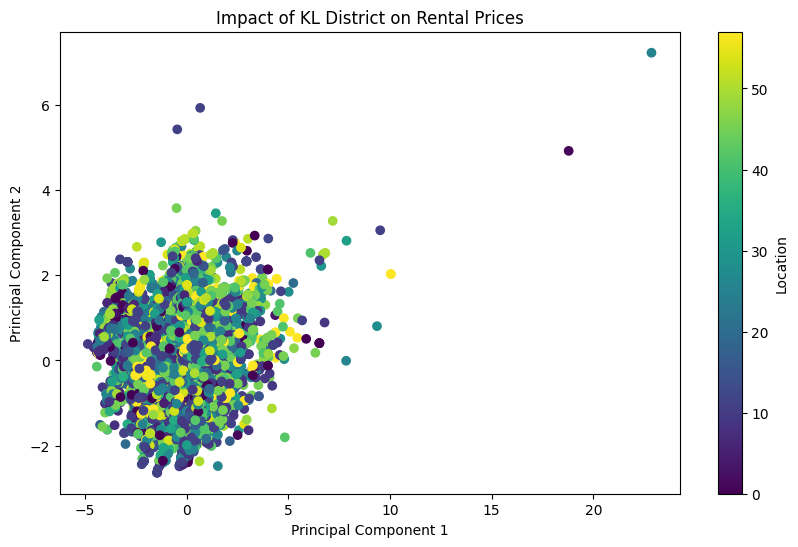

In [ ]:
# Impact of location on rental prices
print(df['District'].nunique())


plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['District'], cmap='viridis')
plt.colorbar(label='Location')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Impact of KL District on Rental Prices')
plt.show()

Then, we created a scatter plot to visualize the impact of size layout on rental prices using Principal Component Analysis (PCA)

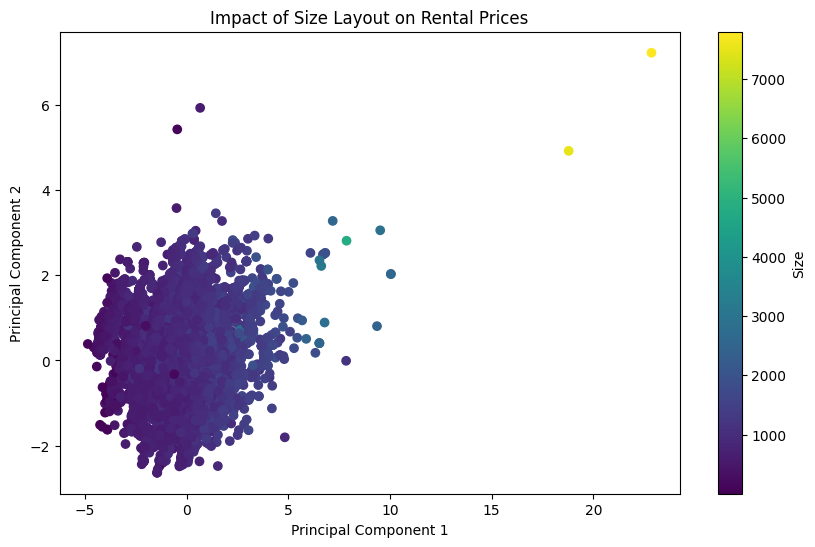

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['Size'], cmap='viridis')
plt.colorbar(label='Size')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Impact of Size Layout on Rental Prices')
plt.show()

The scatter plot helps use visualize how different property types (represented by colors) correlate with the principal components (PCA components), which are indicative of their impact on rental prices.

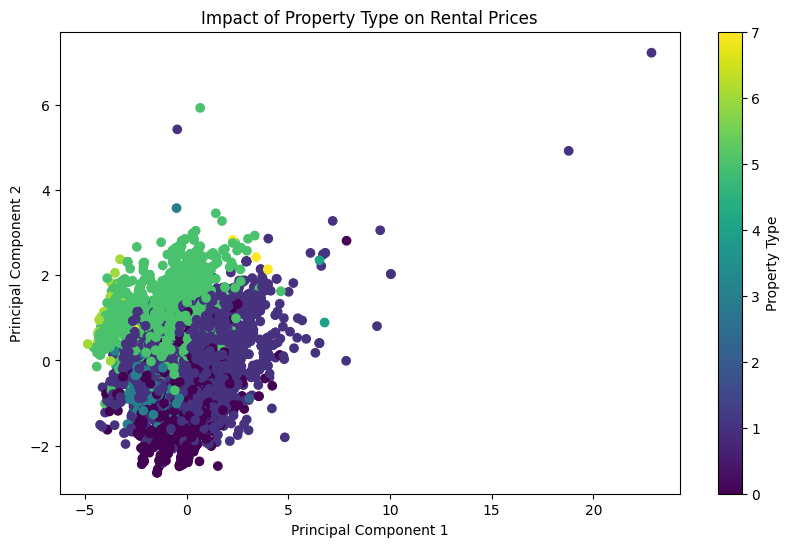

In [ ]:
# Impact of property type on rental prices
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=df['PropertyType'], cmap='viridis')
plt.colorbar(label='Property Type')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Impact of Property Type on Rental Prices')
plt.show()

# Model Training


### CatBoost Model

CatBoost is an efficient gradient boosting library created by Yandex, specifically targeted for applications that require handling categorical information. Categorical Boosting, or CatBoost, is renowned for its high efficiency, rapid processing speed, and ability to handle categorical data without requiring considerable preprocessing.


Splits the dataset into features (X) and target variable (y). Then, further splits the data into training and testing sets using train_test_split.

In [ ]:
X = df.drop("RentalPrice", axis=1)
y = df['RentalPrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("X_train.shape =", X_train.shape)
print("X_test.shape =",  X_test.shape)

print("y_train.shape =", y_train.shape)
print("y_test.shape =", y_test.shape)

X_train.shape = (7127, 9)
X_test.shape = (1782, 9)
y_train.shape = (7127,)
y_test.shape = (1782,)


Initializing a CatBoost Regressor model with specific hyperparameters.

In [ ]:
# Initialize CatBoost Regressor
from catboost import CatBoostRegressor

model = CatBoostRegressor(iterations = 1000, depth = 6, learning_rate = 0.1, loss_function = 'RMSE', eval_metric="RMSE", random_seed=42)

Training the CatBoost model on the training data.

In [ ]:
columns = X.columns.values

# Train the model
model.fit(X_train, y_train, cat_features = columns, verbose = None)

# Make predictions
predictions = model.predict(X_test, verbose = None)

0:	learn: 536.8609054	total: 55.4ms	remaining: 55.3s
1:	learn: 515.7033672	total: 127ms	remaining: 1m 3s
2:	learn: 497.1722917	total: 184ms	remaining: 1m 1s
3:	learn: 481.6094421	total: 235ms	remaining: 58.5s
4:	learn: 469.0153872	total: 285ms	remaining: 56.7s
5:	learn: 456.8131536	total: 335ms	remaining: 55.6s
6:	learn: 446.5336841	total: 398ms	remaining: 56.5s
7:	learn: 432.3776899	total: 457ms	remaining: 56.6s
8:	learn: 420.5013396	total: 523ms	remaining: 57.6s
9:	learn: 410.9013169	total: 592ms	remaining: 58.6s
10:	learn: 402.3330793	total: 668ms	remaining: 1m
11:	learn: 394.0538306	total: 756ms	remaining: 1m 2s
12:	learn: 387.7258051	total: 832ms	remaining: 1m 3s
13:	learn: 382.0639401	total: 930ms	remaining: 1m 5s
14:	learn: 377.7626058	total: 1.01s	remaining: 1m 6s
15:	learn: 373.0845397	total: 1.07s	remaining: 1m 6s
16:	learn: 369.2144513	total: 1.14s	remaining: 1m 6s
17:	learn: 366.0281746	total: 1.23s	remaining: 1m 7s
18:	learn: 362.7882831	total: 1.31s	remaining: 1m 7s
19:	l

It calculates and display the Mean Squared Error (MSE) between the predicted rental prices and the actual rental prices in the test set.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model
# Lower MSE means predicted values are closer to actual values
catb_mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

catb_mae = mean_absolute_error(y_test, predictions)
catb_r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {catb_mae}')
print(f'R^2 Score: {catb_r2}')

Mean Squared Error: 75635.06433390631
Mean Absolute Error (MAE): 193.2444126009433
R^2 Score: 0.7730176029690893


Prints the model's predictions on the test set.

In [ ]:
# Print out model predictions
print(predictions)

[1359.85457338 2283.8122665  2048.63966558 ... 1378.35813311 1384.03699045
 1495.04257398]


We calculates and displays the feature importances, indicating the contribution of each feature to this model's predictions.

In [ ]:
# Retrieve feature importances
feature_importances = model.get_feature_importance()
feature_names = [f'Feature {i}' for i in range(X.shape[1])]

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({'Feature': columns, 'Importance': feature_importances})

# Sort by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

display(importances_df)

,Feature,Importance
0,PropertyName,20.655592
3,District,16.885348
7,Furnishing,15.882089
8,PropertyType,10.922597
6,CarParks,9.649948
5,Bathrooms,9.201773
4,Bedrooms,8.609560
1,Size,8.193094
2,Region,0.000000


The QQ Plot is shown to compare the predicted distribution to a normal distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

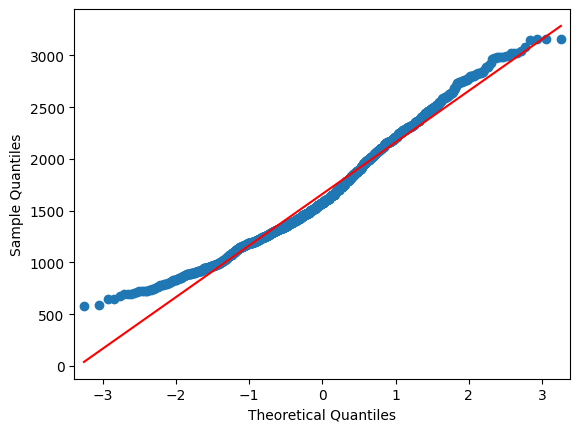

In [ ]:
import statsmodels.api as sm

sm.qqplot(predictions, line = 'r')
plt.show

### Linear Regression Model

Linear regression analysis is employed to forecast the value of a variable by considering the value of another variable. The variable utilised to forecast the value of another variable is referred to as the independent variable.

We create a linear regression model and trains it using the provided training data (X_train and y_train). It then display the coefficients.

In [ ]:
# Using the same train-test split as CatBoost Regression model
modelLinear = LinearRegression()
modelLinear.fit(X_train, y_train)
print(modelLinear.coef_)

[ 8.56358205e-02  6.78988491e-01  6.39488462e-14  9.06570294e-01
 -1.08495378e+02  1.60621060e+02  1.50286206e+02 -2.12721167e+02
  6.60952897e+01]


This code display the intercept value which represents the predicted value when all the features are zero

In [ ]:
print(modelLinear.intercept_)

881.3138832761929


we create a DataFrame to display the coefficients of the linear regression model for each feature to easier show the impact of each feature on the rental prices

In [ ]:
# Effect of a feature on the rental price
display(pd.DataFrame(modelLinear.coef_, X.columns, columns = ['Coeff']))

,Coeff
PropertyName,8.563582e-02
Size,6.789885e-01
Region,6.394885e-14
District,9.065703e-01
Bedrooms,-1.084954e+02
Bathrooms,1.606211e+02
CarParks,1.502862e+02
Furnishing,-2.127212e+02
PropertyType,6.609529e+01


Prints the model's predictions on the test set.

In [ ]:
# Print the predictions
preds = modelLinear.predict(X_test)

print(preds)

[1620.52027612 2105.14572016 2925.53419339 ... 2058.29967457 1170.48005286
 1272.04210455]


It calculate and print the Mean Squared Error (MSE) between the predicted rental prices and the actual rental prices in the test set.

In [ ]:
# Evaluate the model
lr_mse = mean_squared_error(y_test, preds)
lr_mae = mean_absolute_error(y_test, preds)
lr_r2 = r2_score(y_test, preds)

print(f'Mean Squared Error: {lr_mse}')
print(f'Mean Absolute Error (MAE): {lr_mae}')
print(f'R^2 Score: {lr_r2}')

Mean Squared Error: 180958.28285392353
Mean Absolute Error (MAE): 325.9762308848665
R^2 Score: 0.45694043937808937


The QQ Plot is shown to compare the predicted distribution to a normal distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

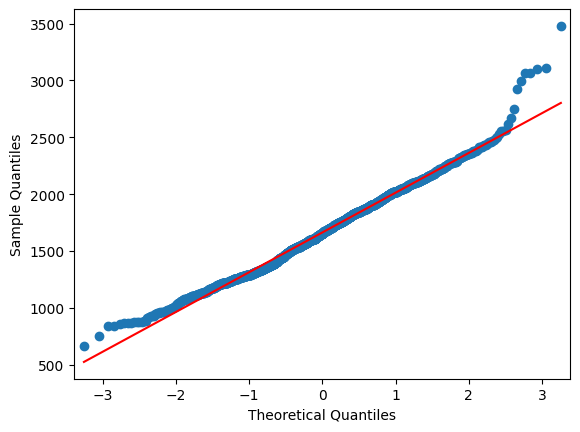

In [ ]:
sm.qqplot(preds, line = 'r')
plt.show

### Random Forest Model

Random Forest is an ensemble learning method in machine learning that combines many decision trees to solve classification and regression problems. During the training process, this system constructs numerous decision trees and then determines the most common class (for classification) or the average prediction (for regression) from the various trees.

We initialize a RandomForest Regressor model with 100 trees (n_estimators=100) and a fixed random seed (random_state=42) to ensure reproducibility. The model under goes training using the provided training data (X_train and y_train).

In [ ]:
# Train the Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

We extracts the features importance from the trained Random Forest Model, and pair them with their names in descending order. After that, we visualize the features importances using a bar plot.

,Feature,Importance
7,Furnishing,0.265976
1,Size,0.254765
0,PropertyName,0.159073
3,District,0.118554
6,CarParks,0.075494
8,PropertyType,0.064262
4,Bedrooms,0.039899
5,Bathrooms,0.021978
2,Region,0.000000


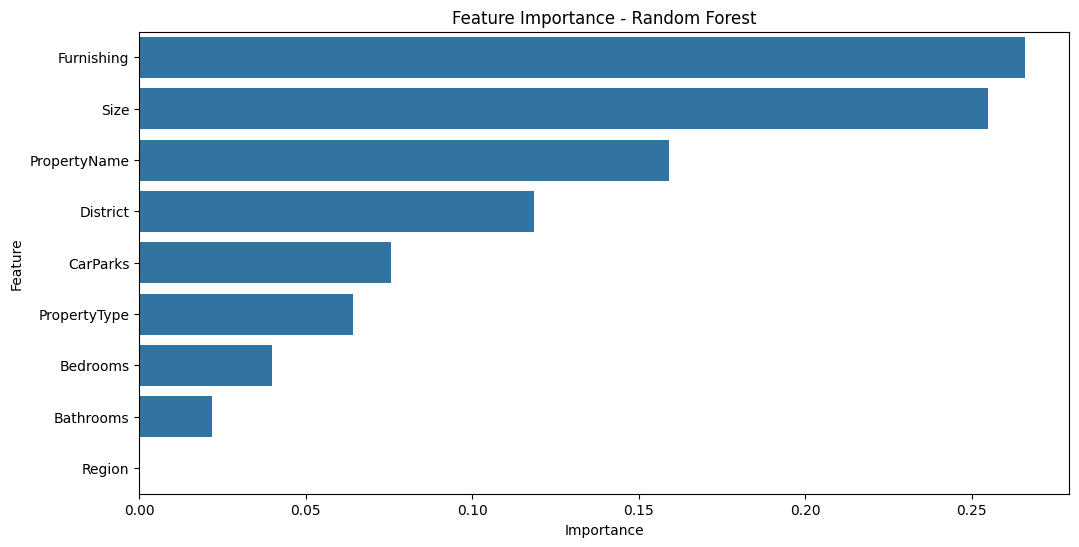

In [ ]:
# Feature importance
importances = rf.feature_importances_
feature_names = X_train.columns
rf_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the feature importances
feature_importances_df = rf_importances_df.sort_values(by='Importance', ascending=False)

display(feature_importances_df)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance - Random Forest')
plt.show()

We are able to makes prediction on the test data (X_test) using the trained Random Forest Model and show the predictions.

In [ ]:
# Making Predictions on the test data
preds = rf.predict(X_test)

print(preds)

[1259.01746032 1887.35555556 1488.075      ... 2080.5        1464.4152381
 1433.65016667]


After that we calculate and print the Mean Squared Error (MSE), Mean Absolute Error (MAE), and r^2 Score between the predicted rental prices and the actual rental prices in the test set. The code that is commented out enables us to create a scatter plot comparing the predicted value and the test value. The QQ Plot is shown to compare the predicted distribution to a normal distribution.

Random Forest Test MSE: 217165.60335663808
Random Forest Test MAE: 346.72906253527844
Random Forest Test R^2: 0.34828151946905495


<function matplotlib.pyplot.show(close=None, block=None)>

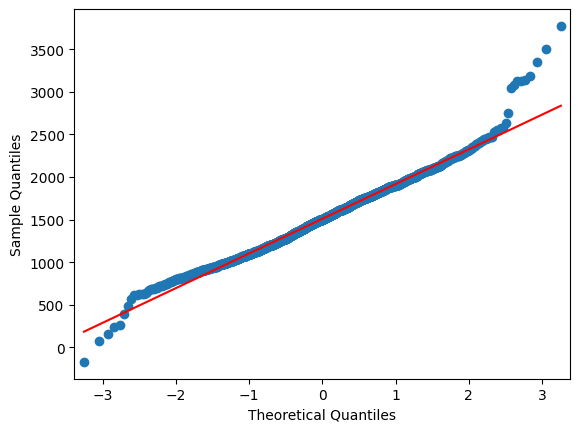

In [ ]:
# Evaluate the model
rf_mse = mean_squared_error(y_test, preds)
rf_mae = mean_absolute_error(y_test, preds)
rf_r2 = r2_score(y_test, preds)

print(f'Random Forest Test MSE: {rf_mse}')
print(f'Random Forest Test MAE: {rf_mae}')
print(f'Random Forest Test R^2: {rf_r2}')


sm.qqplot(preds, line = 'r')
plt.show

### Artificial Neural Networks (ANN)

ANN  utilises computational and mathematical operations to mimic the functions of the human brain. Neural networks consist of linked layers of neurons that process and change input data to provide predictions.


This step converts the DataFrame columns to NumPy arrays of type float. NumPy arrays are required for input into the neural network model. After that we define a sequential neural network model with the shown 3 layers. The model is then compiled using the Adam optimizer, with a learning rate of 0.001. The loss function is Mean Squared Error (MSE), and the metric used for evaluation is Mean Absolute Error (MAE).

In [ ]:
# Convert the DataFrame to numpy arrays
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

# Convert y_train and y_test to numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the ANN model
ann = Sequential()
ann.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
ann.add(Dense(32, activation='relu'))
ann.add(Dense(1, activation='linear'))

# Compile the model
ann.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

The model is trained on the training data (X_train and y_train) with a validation split of 20% (Same as other models). The training runs for 50 epochs with a batch size of 32. The training process is verbose, so it outputs progress information.

In [ ]:
# Train the model
history = ann.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
179/179 [==============================] - 2s 4ms/step - loss: 1054037.0000 - mae: 791.4935 - val_loss: 360458.0625 - val_mae: 425.9190
Epoch 2/50
179/179 [==============================] - 1s 3ms/step - loss: 324563.0000 - mae: 421.5285 - val_loss: 362793.7500 - val_mae: 426.9751
Epoch 3/50
179/179 [==============================] - 1s 3ms/step - loss: 320533.0000 - mae: 419.3043 - val_loss: 362005.0625 - val_mae: 422.5013
Epoch 4/50
179/179 [==============================] - 1s 3ms/step - loss: 319084.3438 - mae: 417.5777 - val_loss: 358537.3438 - val_mae: 423.7056
Epoch 5/50
179/179 [==============================] - 1s 3ms/step - loss: 315425.5938 - mae: 415.1762 - val_loss: 356879.3750 - val_mae: 416.9474
Epoch 6/50
179/179 [==============================] - 1s 4ms/step - loss: 314316.2188 - mae: 414.2776 - val_loss: 352705.5625 - val_mae: 417.9997
Epoch 7/50
179/179 [==============================] - 1s 3ms/step - loss: 312136.0000 - mae: 412.1450 - val_loss: 353034.00

The model makes predictions on the test data (X_test) and are printed.

In [ ]:
# Making Predictions on the test data
preds = ann.predict(X_test).flatten()

print("Prediction:\n", preds)
print("Actual values:\n", y_test)

56/56 [==============================] - 0s 2ms/step
Prediction:
 [1710.6921  1913.3788  3133.2537  ... 1907.553   1017.59216 1288.3435 ]
Actual values:
 [1250. 2800. 2500. ... 1400. 1800. 1600.]


The Mean Squared Error (MSE) is calculated and outputted for the test set predictions to evaluate the model's performance.

In [ ]:
# Evaluate the model on the test set
ann_mse = mean_squared_error(y_test, preds)
ann_mae = mean_absolute_error(y_test, preds)
ann_r2 = r2_score(y_test, preds)

print(f'ANN Test MSE: {ann_mse}')
print(f'ANN Test MAE: {ann_mae}')
print(f'ANN Test R^2: {ann_r2}')

ANN Test MSE: 217165.60335663808
ANN Test MAE: 346.72906253527844
ANN Test R^2: 0.34828151946905495


After that we calculate the Mean Squared Error (MSE) of the predictions on the test_data by comparing the predicted values (preds) to the actual values (y_test). The code that is commented out enables us to create a scatter plot comparing the predicted value and the test value. The QQ Plot is shown to compare the predicted distribution to a normal distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

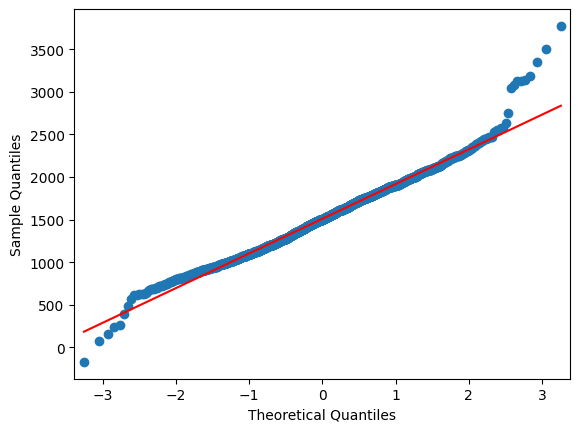

In [ ]:
sm.qqplot(preds, line = 'r')
plt.show

# Evaluation and Comparison


## Comparison of all Models
Display all model's results into a single table for better visualization

In [ ]:
# Store MSE, MAE, R^2 results from all models
mse_results = {
    'Model' : ['CatBoost', 'Linear Regression', 'Random Forest', 'ANN'],
    'MSE' : [catb_mse, lr_mse, rf_mse, ann_mse],
    'MAE' : [catb_mae, lr_mae, rf_mae, ann_mae],
    'R^2' : [catb_r2, lr_r2, rf_r2, ann_r2]
}

# Convert to a DataFrame
mse_df = pd.DataFrame(mse_results)

#Display the comparison table
print(mse_df)

               Model            MSE         MAE       R^2
0           CatBoost   75635.064334  193.244413  0.773018
1  Linear Regression  180958.282854  325.976231  0.456940
2      Random Forest   78782.115023  179.824900  0.763573
3                ANN  217165.603357  346.729063  0.348282


## Evaluation and assessing the quality of models and predictions

1.   CatBoost <br>
<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20004707.png" width="700"> <br>
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20005105.png" width="700">
</div>
It demonstrated strong performance with a comparatively low  Mean Absolute Error (MAE), suggesting that its predictions closely align with the actual values. The R^2 value of 0.7730 indicates that the model can account for around 77.3% of the variability in rental prices, which demonstrates its reliability. <br>
2.   Linear Regression <br>
<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20005419.png" width="700"> <br>
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20005439.png" width="700">
</div>
Linear Regression exhibits elevated error rates in comparison to other models and a diminished R^2 value of 0.4569, signifying that it only accounts for around 45.69% of the variability in rental costs. The predictions generated by this model exhibit lower accuracy and may lack the necessary reliability for effective decision-making. <br>
3.   Random Forest <br>
<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20005620.png" width="700">
</div>
The Random Forest model has superior performance compared to all other models, exhibiting the lowest  Mean Absolute Error (MAE), as well as the second highest R^2 value of 0.7635. This suggests that it offers the most precise forecasts and accounts for 76.35% of the variation in rental prices. <br>
4.   ANN <br>
<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20005830.png" width="700"> <br>
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20005854.png" width="700">
</div>
Artificial Neural Network (ANN) has the highest error levels and the lowest R² performance. The  MAE (Mean Absolute Error) of 346.73 indicate the presence of significant prediction mistakes. The R² value of 0.3482 suggests that this model can only account for around 34.82% of the variation in rental prices, making it less efficient compared to alternative models.<br>

# Why the prediction is useful and important? And recommendations to solve the problem.

Forecasting rental rates yields **vital insights** into the prevailing **dynamics of the real estate industry** in Kuala Lumpur. Accurate rental price forecasting enables stakeholders, including investors, real estate developers, and legislators, to make **well-informed decisions** by considering **both present and future market trends.** <br> <br>
Tenants may also utilise these projections to **strategically allocate their budgets** and identify cost-effective housing options, enabling them to **make informed housing choices** aligned with their financial circumstances. Real estate firms and property managers utilise these projections to **maintain a competitive edge** in the market, adapt their marketing methods, establish **competitive rental prices**, and enhance their ability to recruit renters. <br> <br>
Moreover, people seeking to purchase or lease real estate might utilise forecasts to **formulate strategic financial strategies**, enabling them to prepare for forthcoming expenditures, savings, and housing-related investments.

## Recommendations

The features importances derived from the Random Forest model offer significant insights into the specific effects that various factors have on rental pricing in Kuala Lumpur. The following provides in-depth analysis for each aim and offers ideas on how the analysis may address these issues.<br>
<div style="text-align:center">
    <img src="https://raw.githubusercontent.com/ChuaSiongYong/ML-Assignment-Project/45a8ccaf6b61a6300b1270c40fc7a4e9c710bc53/5_Project/Screenshot%202024-06-27%20010146.png" width="300">
</div>

1.   How does location affect rental prices in Kuala Lumpur? <br>
- District achieved an importance rating of over 0.1185 which is 11.85%. The significance of the district implies that rental rates exhibit substantial variation among various districts in Kuala Lumpur. Some districts are more likely to have higher rental costs because of variables such as their closeness to corporate centres, transit hubs, amenities, and general appeal.
- Investors should prioritise investing in districts that exhibit strong demand and higher rental pricing. Future investment prospects should take into account emerging neighbourhoods that are becoming more desirable.
-Tenants may utilise district-level data to locate cost-effective housing alternatives and make well-informed decisions based on rental pricing trends in various places. <br>

2.   How Does Size/Layout Impact Rental Prices? <br>
- Size achieved an importance rating of 0.2547 or around 25.47% which is the second most important feature affecting rental prices in this model.
- Tenants should assess rental houses by considering their dimensions and size in order to choose the most cost-effective option.
- For Real Estate Developers: Create and construct properties that specifically target the market need for larger-sized residences.

3.   How does property type impact rental prices? <br>
- While property type achieved an importance rating of only 0.0642 which is around 6.42%, furnishing saw the highest importance rating of 0.2660 which is 26.6%. Properties that are furnished often have higher rental fees since they provide more convenience and amenities.
- Investors should diversify their assets by allocating funds across multiple property types in order to target diverse market niches. Equipping properties might serve as a tactic to enhance rental revenue.
- Tenants should carefully weigh the pros and cons of furnished and unfurnished apartments, taking into account their budget and personal preferences. Assess several sorts of properties to choose the most suitable option for their requirements.